---
title: "Edge Detection from a 30 meter DEM"
author: "Ryan E Lima"
email: Ryan.Lima@nau.edu
format: html
license: "CC BY 4.0"
---

In [2]:
from Lineament_Detection import *
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox, fixed
from pyproj import CRS


In [3]:
DEM_PATH = r'sample_data/dem2.tif'
SHAPEFILE_PATH =r'sample_data/Manual_Lineaments_LM.shp'

Masked pixels: 37275
DEM min/max (valid): 1998.0142 2180.3457
DEM CRS = EPSG:6341


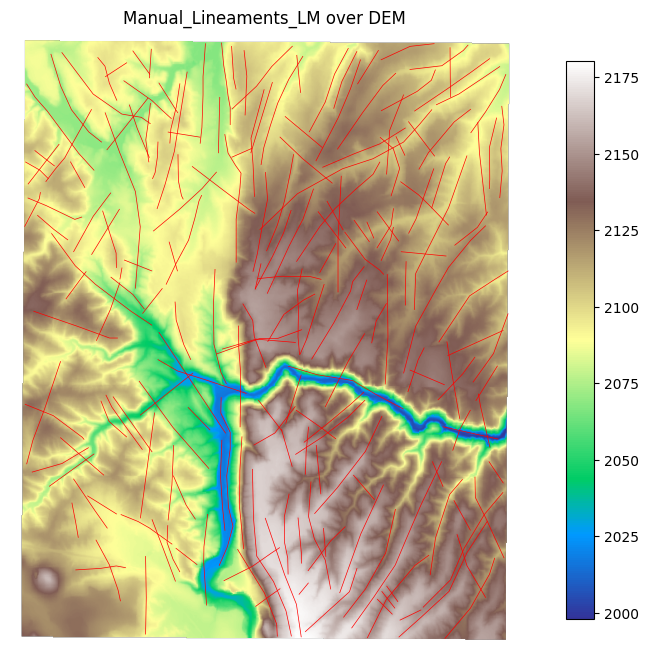

None


In [4]:
spatial_reference = plot_lines_over_dem(
        dem_path=DEM_PATH,
        shapefile_path=SHAPEFILE_PATH
    )

print(spatial_reference)

In [5]:
### interactive canny edge detection:

# Use interactive sliders to adjust the Canny thresholds dynamically
# When the values you have selected values you like, simply click the `save to shapefile` checkbox to save the lines to a shapefile.
interact(plot_canny_edges,
         dem_path =fixed(DEM_PATH),
         threshold1=FloatSlider(min=0.0, max=50.0, step=0.1, value=1.0, description='Threshold 1'),
         threshold2=FloatSlider(min=0.0, max=255.0, step=1.0, value=15.0, description='Threshold 2'),
         save_lines=Checkbox(value=False, description='Save to Shapefile'),
         debug=Checkbox(value=False, description='Debug Mode')
         )

interactive(children=(FloatSlider(value=1.0, description='Threshold 1', max=50.0), FloatSlider(value=15.0, des…

<function Lineament_Detection.plot_canny_edges(dem_path, threshold1=1.0, threshold2=10.0, save_lines=False, debug=False)>

In [ ]:
# Use interactive sliders to adjust the flood neighborhood and offset thresholds dynamically
# When the values you have selected values you like, simply click the `save to shapefile` checkbox to save the lines to a shapefile.
interact(plot_local_flood_edges,
         dem_path=fixed(DEM_PATH),
         save_lines=Checkbox(value=False),
         debug=Checkbox(value=False),
         save_rose=Checkbox(value=False, description='Save Rose Diagram',
         window_size=IntSlider(min=3, max=51, step=2, value=11),
         offset=FloatSlider(min=0.1, max=20.0, step=0.1, value=5.0))
)

interactive(children=(IntSlider(value=11, description='window_size', max=33, min=-11), FloatSlider(value=5.0, …

<function Lineament_Detection.plot_local_flood_edges(dem_path, window_size=11, offset=5.0, save_lines=False, debug=False, save_rose=False)>

In [10]:
shapefile_path = r'out_flood\flood_lines_dem2_win7_off1.1.shp'
reference_raster_path = DEM_PATH

mask, gdf, crs, transform = rasterize_shapefile(shapefile_path, reference_raster_path)



In [ ]:
interact(run_hough_p,
         mask=fixed(mask),
         gdf=fixed(gdf),
         spatial_ref=fixed(crs),
         transform=fixed(transform),
         rho=IntSlider(min=1, max=5, step=1, value=2),
         theta_deg=FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5),
         threshold=IntSlider(min=10, max=100, step=5, value=30),
         min_line_length=IntSlider(min=5, max=100, step=5, value=10),
         max_line_gap=IntSlider(min=1, max=50, step=1, value=4),
         save_lines=Checkbox(value=False),
         save_rose=Checkbox(value=False))

interactive(children=(IntSlider(value=2, description='rho', max=5, min=1), FloatSlider(value=0.5, description=…

<function Lineament_Detection.run_hough_p(mask, gdf, spatial_ref, transform, rho=2, theta_deg=0.5, threshold=30, min_line_length=10, max_line_gap=4, save_lines=False, save_rose=False)>